In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Importing data

In [2]:
(X_train,y_train) , (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

# Data Visualization

[6]


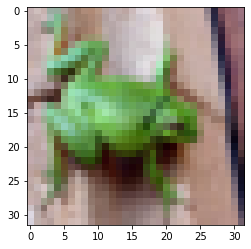

In [4]:
i = 4234
plt.imshow(X_train[i])
print(y_train[i])

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

# Normalizing the pixel values of images

In [6]:
X_train = X_train/255
X_train = X_train.astype('float32')
X_test = X_test/255
X_test = X_test.astype('float32')

# Converting output into categories

In [7]:
num_categories = 10

In [8]:
import keras


In [9]:
y_train = keras.utils.to_categorical(y_train,num_categories)
y_test = keras.utils.to_categorical(y_test,num_categories)

In [10]:
y_train.shape

(50000, 10)

In [13]:
X_train.shape

(50000, 32, 32, 3)

# Creating the CNN Network 

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3) ,activation = 'relu' , input_shape = (32,32,3)))
model.add(tf.keras.layers.Conv2D(32,(3,3) ,activation = 'relu' ))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu' ))
model.add(tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu' ))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=1024 , activation= 'relu'))
model.add(tf.keras.layers.Dense(units=1024 , activation= 'relu'))
model.add(tf.keras.layers.Dense(units = 10 , activation= 'softmax'))
model.summary()

          

          

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      

In [17]:
model.compile(optimizer='Adam' , metrics=['accuracy'] , loss = 'categorical_crossentropy')

In [18]:
epochs_hist = model.fit(X_train , y_train , epochs = 20 , batch_size = 512)

Epoch 1/20
98/98 [==============================] - 60s 605ms/step - loss: 1.7545 - accuracy: 0.3548
Epoch 2/20
98/98 [==============================] - 59s 597ms/step - loss: 1.3041 - accuracy: 0.5318
Epoch 3/20
98/98 [==============================] - 59s 599ms/step - loss: 1.0988 - accuracy: 0.6099
Epoch 4/20
98/98 [==============================] - 59s 598ms/step - loss: 0.9473 - accuracy: 0.6639
Epoch 5/20
98/98 [==============================] - 58s 596ms/step - loss: 0.8194 - accuracy: 0.7123
Epoch 6/20
98/98 [==============================] - 59s 602ms/step - loss: 0.7133 - accuracy: 0.7489
Epoch 7/20
98/98 [==============================] - 59s 597ms/step - loss: 0.6251 - accuracy: 0.7796
Epoch 8/20
98/98 [==============================] - 59s 599ms/step - loss: 0.5324 - accuracy: 0.8137
Epoch 9/20
98/98 [==============================] - 60s 610ms/step - loss: 0.4535 - accuracy: 0.8414
Epoch 10/20
98/98 [==============================] - 59s 607ms/step - loss: 0.3717 - accura

# Evaluating the perfromance of the model

In [20]:
evaluation = model.evaluate(X_test,y_test)
print(evaluation)

313/313 [==============================] - 3s 9ms/step - loss: 1.4498 - accuracy: 0.7338
[1.4498363733291626, 0.7337999939918518]


In [28]:
predicted = model.predict(X_test)
predicted = predicted.argmax(1)
y_test = y_test.argmax(1)

313/313 [==============================] - 3s 9ms/step


actual: 2 prediction : 6


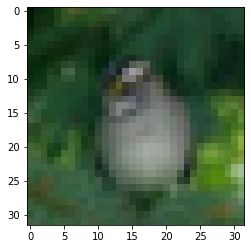

In [36]:
i =900
plt.imshow(X_test[i])
print("actual:", y_test[i] ,"prediction :", predicted[i])